<a href="https://colab.research.google.com/github/YaeliBarGimelshtein/ML_HW1/blob/main/Machine_Learning_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster ⚓

Yaeli Bar Gimelshtein 208722710

Kaggle: https://www.kaggle.com/yaeligimelshtein





The Titainic competition is a classification model of ML.

We calssify for each passanger on the Titanic whether he survived or didnt.

I will use 2 ML algorithms:


1.   Logistic Regression
2.   Multy Layer Perceptron (Gadi explained that thats a wrong name since it is a sigmoid and not perceptron)



### **Step 1: Data Investigation and Preprocessing** 🔽

In [ ]:
#Imports
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neural_network
from sklearn import linear_model
from sklearn import metrics

In [ ]:
#Load the data
dataset = pd.read_csv('train.csv')

In [ ]:
#Show the data
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now, I will learn and understand the data.

I will start with getting the `keys` of this dataset and understand what each of them represent.

In [ ]:
print(dataset.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


As we can see there are 12 keys:

1. `PassengerId` id of a passanger
2. `Survived`  0 = No, 1 = Yes
3. `Pclass`  Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
4. `Name`  Name of a passanger
5. `Sex`  sex of a passanger
6. `Age`  Age in years of a passanger
7. `SibSp`  number of siblings / spouses aboard the Titanic
8. `Parch`  number of parents / children aboard the Titanic
9. `Ticket`  Ticket class
10. `Fare`  Passenger fare
11. `Cabin`  Cabin number
12. `Embarked`  Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

#### **Feature Engineering**⏬

Now, I need to understand the type of the features to make sure my model can learn it perfectly

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I will start by identifing for each key the mathematical and statistical definision:

> `PassengerId` Discrete variable, each passanger has its own id, represnts by an int that can be read by the model

> `Survived`  Discrete binary variable, each passanger survived or not, represnts by an int that can be read by the model

> `Pclass` Ordinal (Categorial) variable, the first class is "better" that second that is "better" than the third, represnts by an int that can be read by the model

> `Name` Not a mathmatical variable, doesnt effect the outcome of the Titanic disaster, represnts by an object that can not be read perfectly by the model

> `Sex` Discrete Categorial binary  variable, each passanger is a man or a woman, represnts by an object that can not be read perfectly by the model

> `Age` Interval variable, each passanger has its own age, represnts by an int that can be read by the model

> `SibSp` Discrete  variable, each passanger has a numner of sibllings or spouses on board, represnts by an int that can be read by the model

> `Parch` Discrete  variable, each passanger has a numner of parents or children on board, represnts by an int that can be read by the model

> `Ticket` Discrete variable, each passanger has a ticket with a unique number, represnts by an object that can not be read perfectly by the model

> `Fare` Continuous variable, each passanger paid a different amount, represnts by a float that can be read by the model

> `Cabin` Discrete variable, each passanger has a cabin with a unique number, represnts by an object that can not be read perfectly by the model

> `Embarked`  Discrete Categorial variable, each passanger embarked from one of three ports, represnts by an object that can not be read perfectly by the model





So, in conclusion, I will have to change the way `Sex` , `Ticket` , `Cabin` and `Embarked` are represented in the `dataset` if i would end up using this features

Now, I need to check if there are any missing values in the features

In [ ]:
# check if there is missing data
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
# count empty values in each column function
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

In [ ]:
# count empty values in each column in the dataset
count_empty_values_in_each_column(dataset) 

empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


So, in conclusion, I will have to **fill up** `Age` , `Cabin` and `Embarked` in order to use them as features that the model will learn

### Changing the dataset

As mentioned above, there are  features that are not represented by an python number: `Sex` , `Ticket` , `Cabin`, `Name` and `Embarked`, and also the is missing values in `Age` , `Cabin` and `Embarked`

*Dropping features* ✒

After carefully looking at the data, I decided to drop: 


1.   `Cabin` there is just to much data missing to fill it up (687 missing rows) and also it is a string that I would not have been able to represent as a number
2.   `Name` there is no real connection between the name of a person and if he survived and also it is a string that I would not have been able to represent as a number

3. `Ticket` there is no way to encode it to numbers, and the `Pclass` will have the same kind of connection to survival

4. `PassengerId` feature to only make order in the dataset





In [ ]:
dataset_less_fueatures = dataset.copy()
# remove unneeded columns
dataset_less_fueatures.drop(columns='Name', inplace = True, axis =1) # remove the name column!
dataset_less_fueatures.drop(columns='Cabin', inplace = True, axis =1) # remove the cabin column!
dataset_less_fueatures.drop(columns='Ticket', inplace = True, axis =1) # remove the ticket column!
dataset_less_fueatures.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!

# show the new dataset
dataset_less_fueatures

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


*fill the missing values* ✒

Looking at the data, I decided to fill:


1.   `Embarked` since there are only 2 values missing, i will fill them with random values of the column
2.   `Age` since there are 177 missing values,  i will fill them with the mean of the column



In [ ]:
# fill empty values in the dataset , 3 ways
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [ ]:
# filling in the missing values in Embarked
dataset_less_fueatures_and_filled_values = dataset_less_fueatures.copy()
fill_na_random_pick_column_distribution(dataset_less_fueatures_and_filled_values, 'Embarked')
count_empty_values_in_each_column(dataset_less_fueatures_and_filled_values)


empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


In [ ]:
# filling in the missing values in Age
fill_na_median(dataset_less_fueatures_and_filled_values, 'Age') #fill age nans with median value ---- maybe mean is better
count_empty_values_in_each_column(dataset_less_fueatures_and_filled_values)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


As we can see, now there are no missing values at all

*Encoding Categorial Values* ✒

As said above, there are 3 features that are categorial:


1.   `Sex`
2.   `Pclass`
3.   `Embarked`


I will encode them, using the dummy encoding.





In [ ]:
# dummy encode the categorical variables in the df with get_dummies
dataset_less_fueatures_and_filled_values_encoded = dataset_less_fueatures_and_filled_values.copy()
dataset_less_fueatures_and_filled_values_encoded = pd.get_dummies(dataset_less_fueatures_and_filled_values_encoded, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,28.0,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


#### **Pre Processing**⏬

now, I will try to change the features by creating or dropping more columns and check the correlation to make sure the features are helping my goal of creating a learning model.

### Adding columns

I tis logical to guess there is a connection between `SibSp` and `Parch` . So, I will add them as a new column.

In [ ]:
# add new column for relatives from sibSp + Parch
dataset_less_fueatures_and_filled_values_encoded['Relatives'] = dataset_less_fueatures_and_filled_values_encoded.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,0,22.0,1,0,7.2500,1,0,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1,0
887,1,19.0,0,0,30.0000,0,0,0,0,1,0
888,0,28.0,1,2,23.4500,0,0,1,0,1,3
889,1,26.0,0,0,30.0000,1,0,0,0,0,0


Now, I will start understanding the connections between all of these features by ussing a pair plot and Correlation.

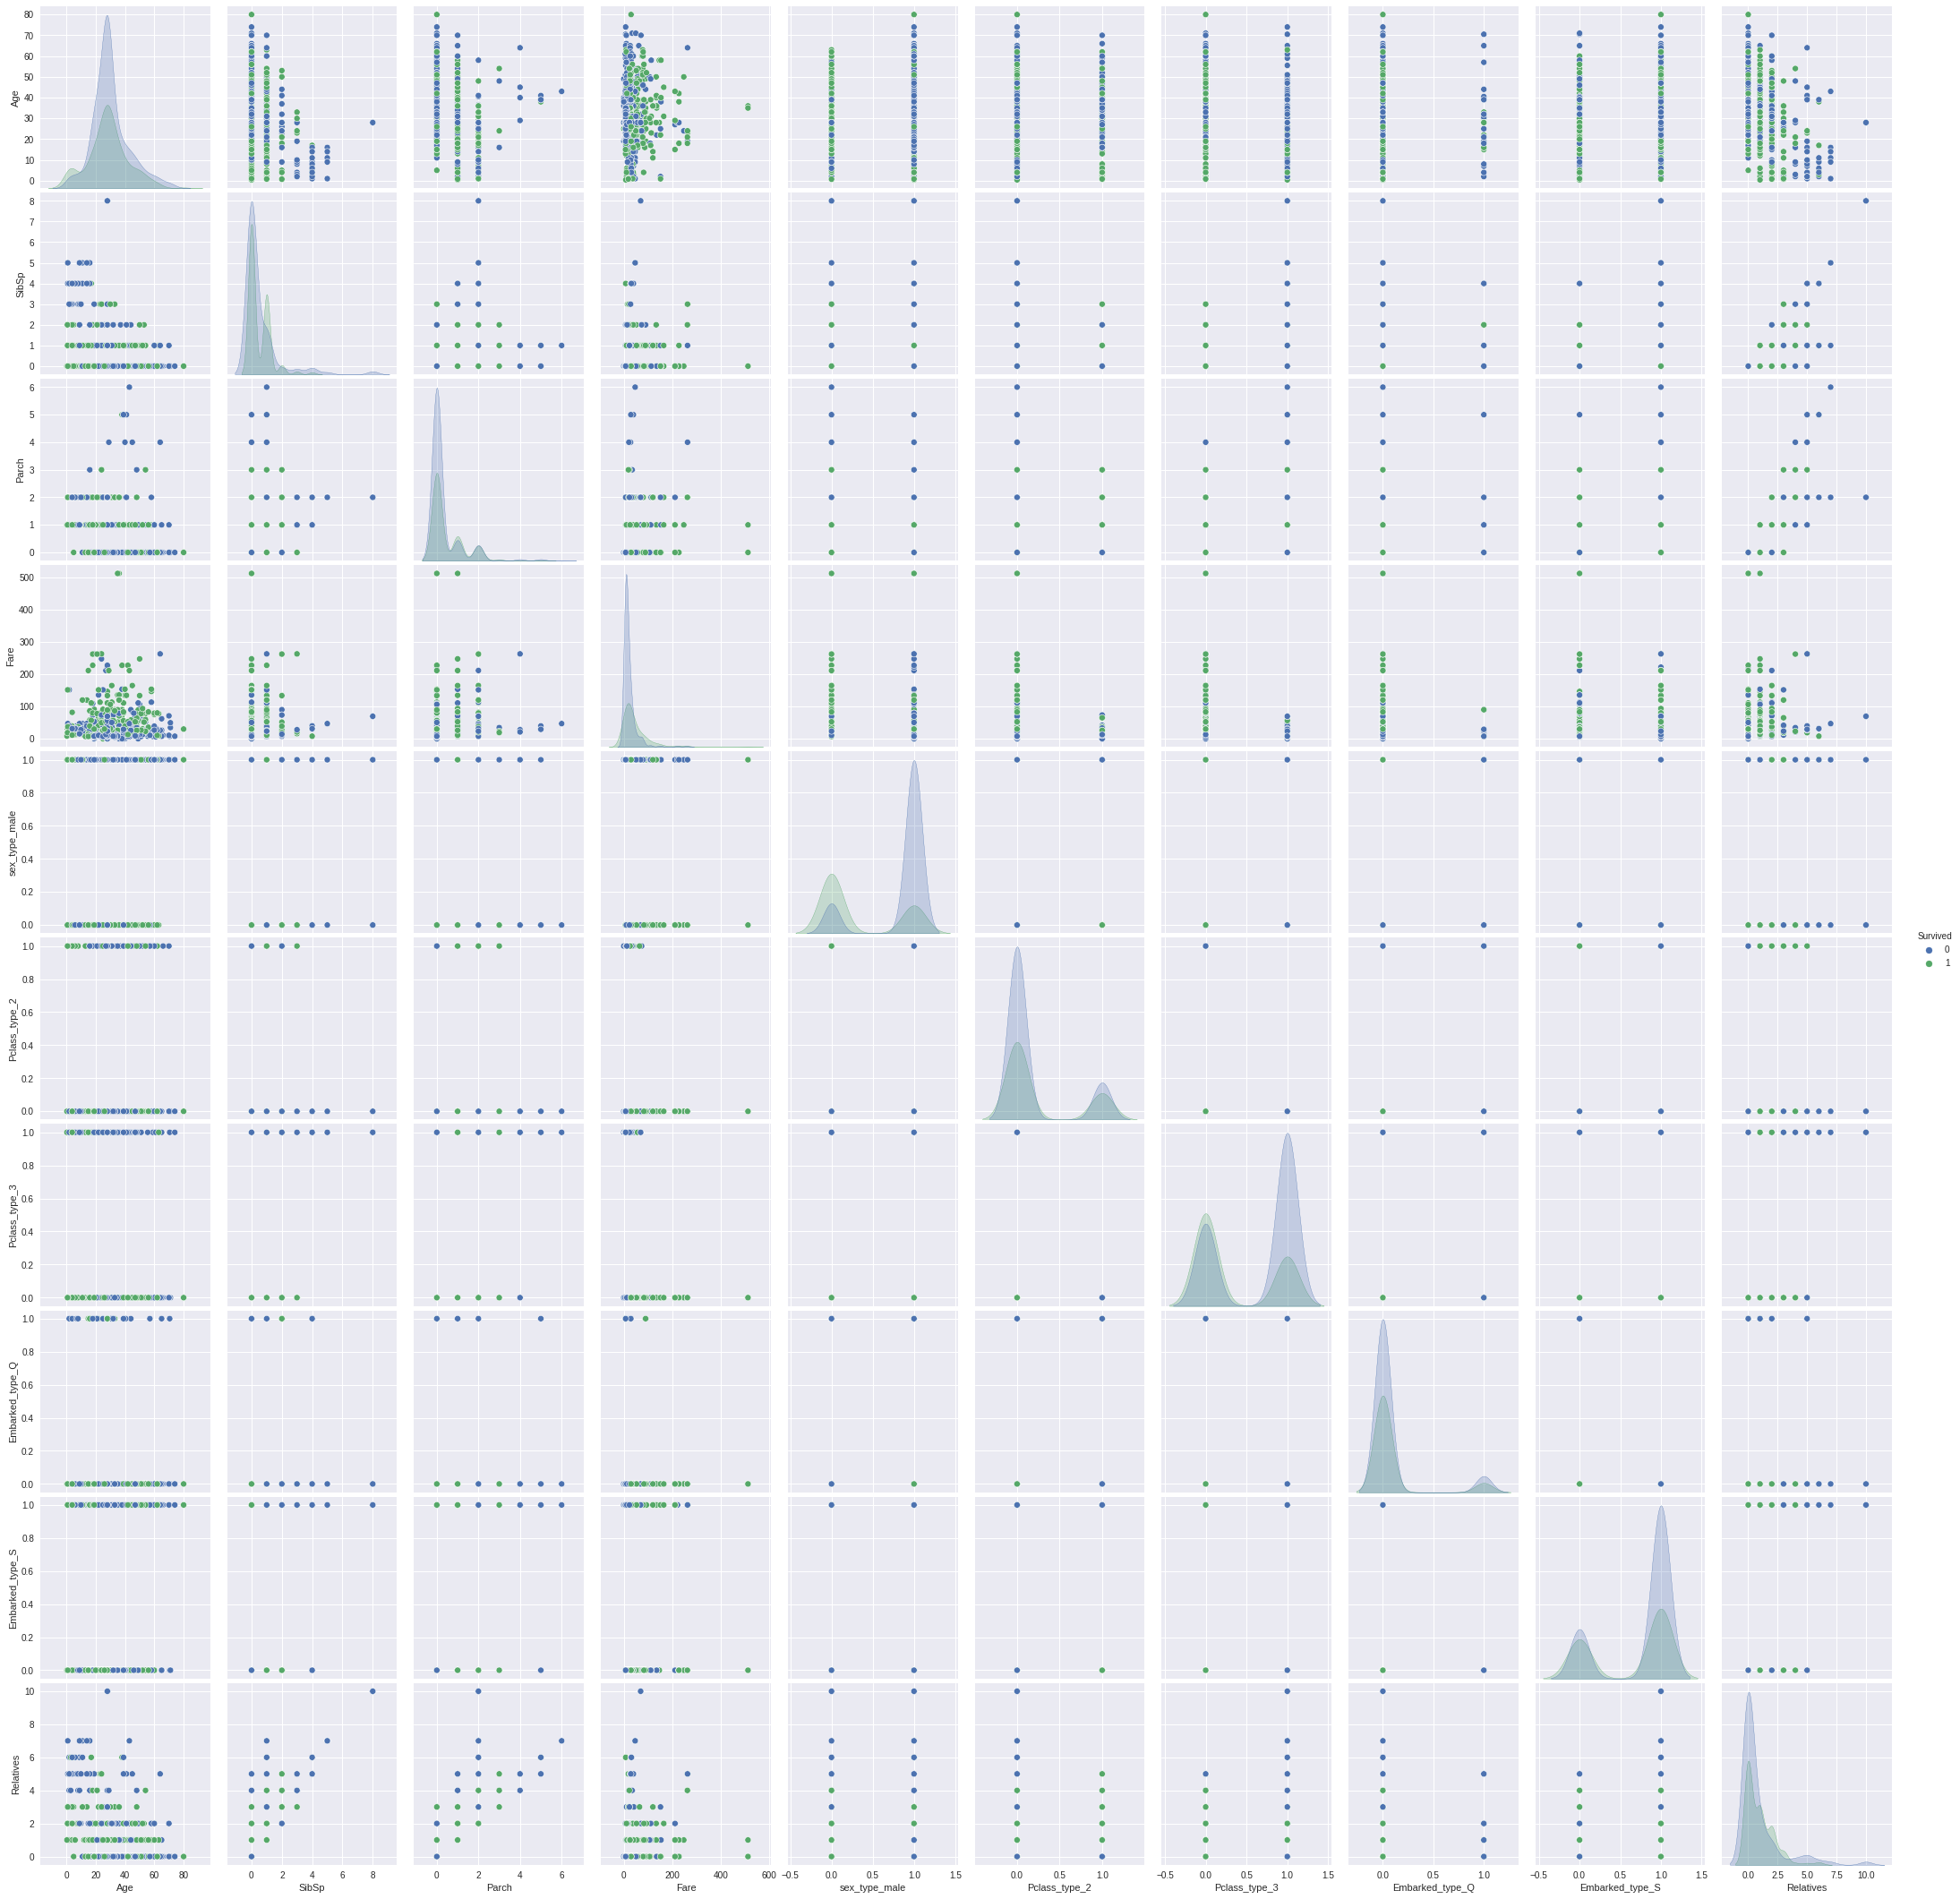

In [ ]:
# show pairplot of the features
sns.pairplot(data=dataset_less_fueatures_and_filled_values_encoded, hue="Survived", height=3)

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. 


But when we have more than two categories for the categorical variable the Pearson correlation is not appropriate anymore. Checking if two categorical variables are independent can be done with Chi-Squared test of independence.


This is a typical Chi-Square test: if we assume that two variables are independent, then the values of the contingency table for these variables should be distributed uniformly. And then we check how far away from uniform the actual values are.


There also exists a Crammer's V that is a measure of correlation that follows from this test


So, I will use Cramer's V, that is based on Chi - square test.

reference: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix &&
https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

In [ ]:
# Building of the Cramer's V function
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
# Building of the matrix

rows= []

for var1 in dataset_less_fueatures_and_filled_values_encoded:
  col = []
  for var2 in dataset_less_fueatures_and_filled_values_encoded :
    cramers =cramers_V(dataset_less_fueatures_and_filled_values_encoded[var1], dataset_less_fueatures_and_filled_values_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = dataset_less_fueatures_and_filled_values_encoded.columns, index =dataset_less_fueatures_and_filled_values_encoded.columns)

df

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
Survived,1.00,0.13,0.04,0.03,0.48,0.29,0.01,0.10,0.00,0.02,0.09
Age,0.13,1.00,0.14,0.18,0.30,0.10,0.15,0.22,0.15,0.15,0.14
SibSp,0.04,0.14,1.00,0.06,0.75,0.05,0.02,0.05,0.01,0.01,0.59
Parch,0.03,0.18,0.06,1.00,0.40,0.07,0.01,0.01,0.01,0.01,0.25
Fare,0.48,0.30,0.75,0.40,1.00,0.41,0.94,0.98,0.91,0.90,0.88
sex_type_male,0.29,0.10,0.05,0.07,0.41,1.00,0.00,0.02,0.00,0.01,0.11
Pclass_type_2,0.01,0.15,0.02,0.01,0.94,0.00,0.99,0.32,0.01,0.03,0.03
Pclass_type_3,0.10,0.22,0.05,0.01,0.98,0.02,0.32,1.00,0.05,0.00,0.08
Embarked_type_Q,0.00,0.15,0.01,0.01,0.91,0.00,0.01,0.05,0.99,0.24,0.02
Embarked_type_S,0.02,0.15,0.01,0.01,0.90,0.01,0.03,0.00,0.24,0.99,0.02


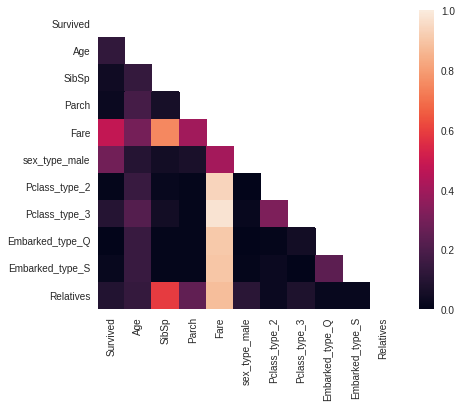

In [ ]:
# Add a heatmap to the matrix
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

As we can see, some of the strongest connections to `Survived`are:


1.   `Fare`
2.   `Sex`

And some of the weakest connections to `Survived`are:


1.   `Pclass`
2.   `Embarked`
3.   `Relatives`





As a result of the  Cramer's V test , I decided to drop some features of the data set, that are not connected strongly to `Survived`:


1.   `Parch`
2.   `SibSp`



In [ ]:
dataset_less_fueatures_and_filled_values_encoded.drop(columns='SibSp', inplace = True, axis =1) # remove the sibsp column!
dataset_less_fueatures_and_filled_values_encoded.drop(columns='Parch', inplace = True, axis =1) # remove the parch column!
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,0,22.0,7.2500,1,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,0
887,1,19.0,30.0000,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,1,0,1,3
889,1,26.0,30.0000,1,0,0,0,0,0


Now, I will check the Correlation again

In [ ]:
# Building of the matrix

rows= []

for var1 in dataset_less_fueatures_and_filled_values_encoded:
  col = []
  for var2 in dataset_less_fueatures_and_filled_values_encoded :
    cramers =cramers_V(dataset_less_fueatures_and_filled_values_encoded[var1], dataset_less_fueatures_and_filled_values_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = dataset_less_fueatures_and_filled_values_encoded.columns, index =dataset_less_fueatures_and_filled_values_encoded.columns)

df

,Survived,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
Survived,1.00,0.13,0.48,0.29,0.01,0.10,0.00,0.02,0.09
Age,0.13,1.00,0.30,0.10,0.15,0.22,0.15,0.15,0.14
Fare,0.48,0.30,1.00,0.41,0.94,0.98,0.91,0.90,0.88
sex_type_male,0.29,0.10,0.41,1.00,0.00,0.02,0.00,0.01,0.11
Pclass_type_2,0.01,0.15,0.94,0.00,0.99,0.32,0.01,0.03,0.03
Pclass_type_3,0.10,0.22,0.98,0.02,0.32,1.00,0.05,0.00,0.08
Embarked_type_Q,0.00,0.15,0.91,0.00,0.01,0.05,0.99,0.24,0.02
Embarked_type_S,0.02,0.15,0.90,0.01,0.03,0.00,0.24,0.99,0.02
Relatives,0.09,0.14,0.88,0.11,0.03,0.08,0.02,0.02,1.00


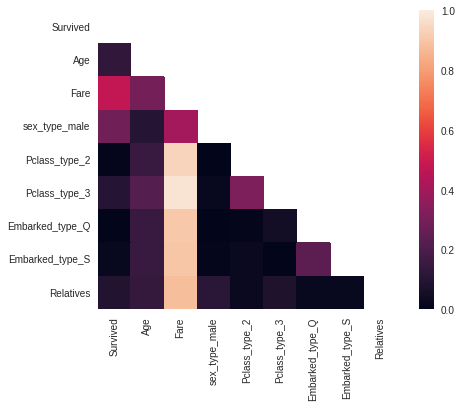

In [ ]:
# Add a heatmap to the matrix
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:
# get color map
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, title=f'{df.columns[i]} by {target_column_name}', ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols): 
        fig.delaxes(axes.flatten()[i]) # Flattening so we can access axes array as a 1-d array to delete unused axes objects



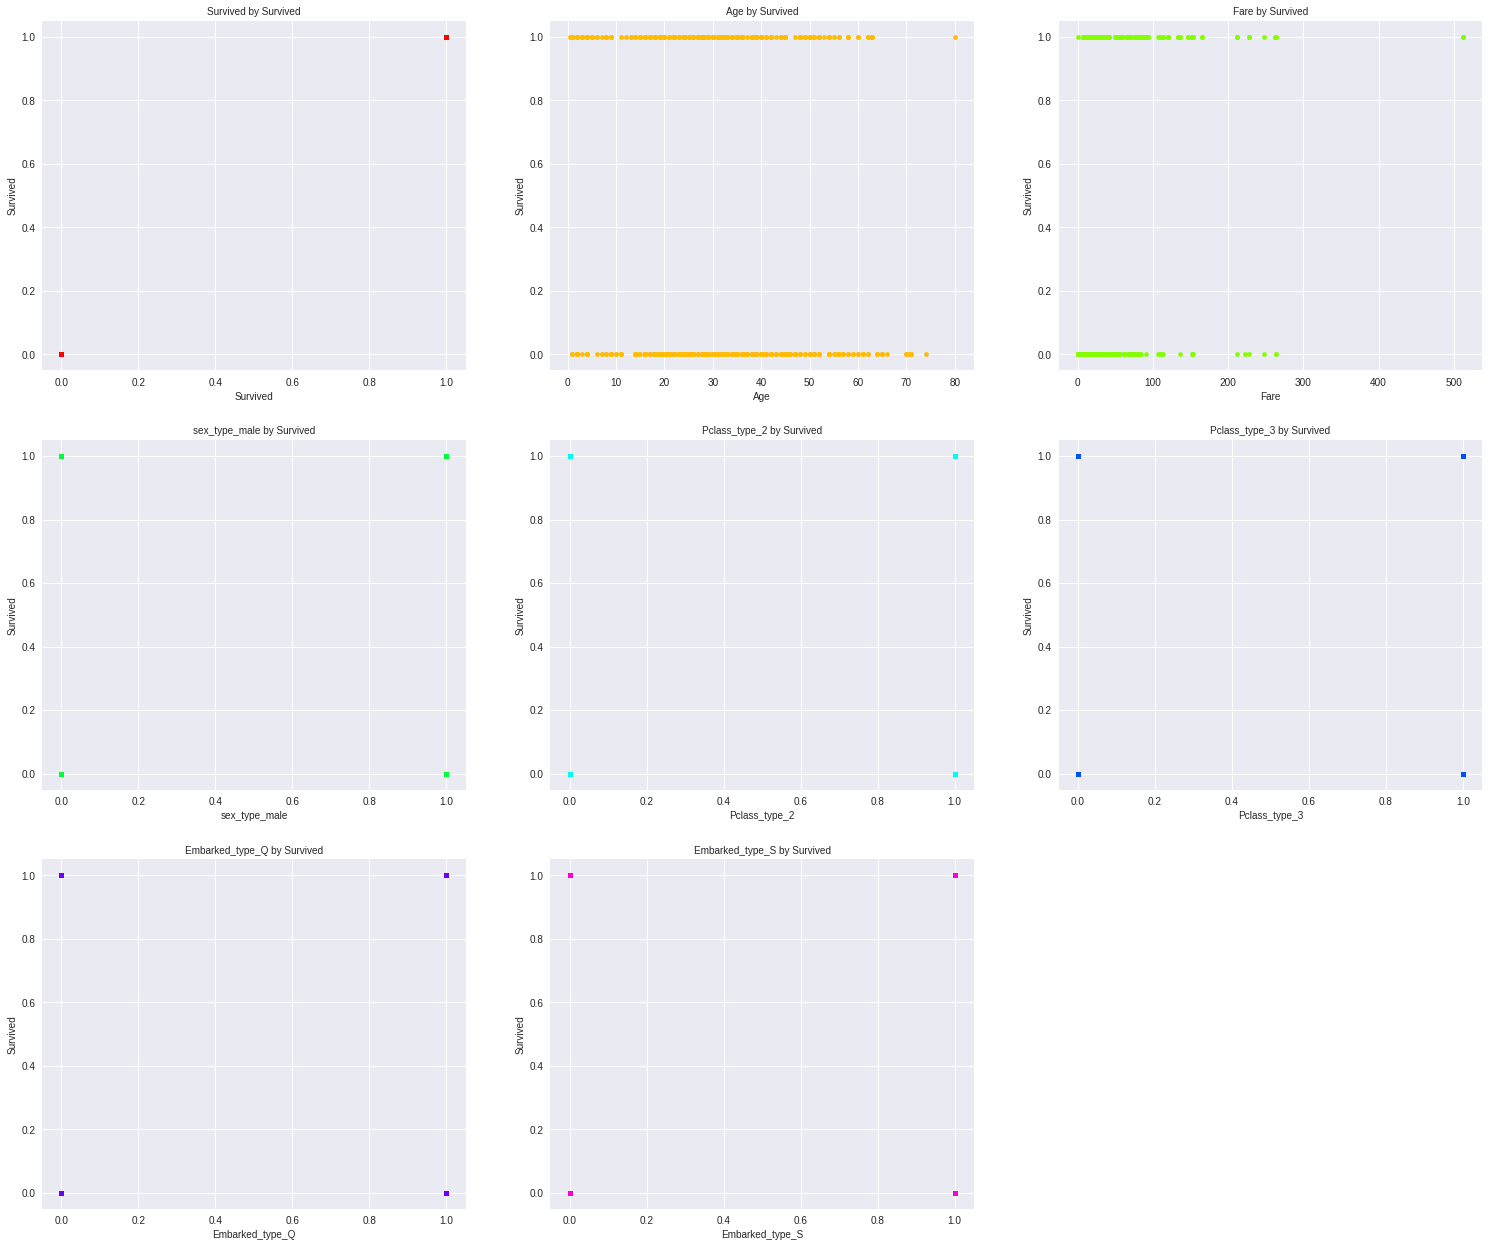

In [ ]:
plot_target_values_by_each_feature(dataset_less_fueatures_and_filled_values_encoded, 'Survived')

We can see that the graphs are not good enough where there are 2 categorial variables

#### **Building the Model**⏬

I will try both MLP and logistic regression so I can choose the better one. The obvious diffrence between these 2 algoritems is that MLP is more complicated and does more transformation on the features 

In [ ]:
t = dataset_less_fueatures_and_filled_values_encoded['Survived']
x = dataset_less_fueatures_and_filled_values_encoded.drop('Survived', axis=1)

x_train, x_validation, t_train, t_validation = train_test_split(x, t, test_size=0.15, random_state=2)


In [ ]:
# normalize values: 
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_validation_norm = sc.transform(x_validation)

In [ ]:
# train the model with logic reg SGD
logicReg = linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01).fit(x_train_norm, t_train)
y_train_prob = logicReg.predict_proba(x_train_norm)
y_validation_prob = logicReg.predict_proba(x_validation_norm)
print('Accuracy score on train', logicReg.score(x_train_norm, t_train))
print('Accuracy score on test', logicReg.score(x_validation_norm, t_validation))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_validation, y_validation_prob))

Accuracy score on train 0.8150594451783355
Accuracy score on test 0.7835820895522388

CE on train 0.43395326883578345
CE on test 0.49502291512831326


In [ ]:
# train the model with MLP
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=20000).fit(x_train_norm, t_train)
y_train_prob = MLP_cls.predict_proba(x_train_norm)
y_validation_prob = MLP_cls.predict_proba(x_validation_norm)
print('Accuracy score on train', MLP_cls.score(x_train_norm, t_train))
print('Accuracy score on test', MLP_cls.score(x_validation_norm, t_validation))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_validation, y_validation_prob))

Accuracy score on train 0.8124174372523117
Accuracy score on test 0.753731343283582

CE on train 0.4582015474268895
CE on test 0.5031046580468729


# Working on the TEST ⚡

In [ ]:
# working on TEST data now
test_dataset = pd.read_csv('test.csv')

#save the id for submission
test_id = test_dataset['PassengerId']

test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#check what features have empty values
count_empty_values_in_each_column(test_dataset) 

empty values
------------

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


## Getting the data ready to the model ⏬

doing the entire process of the Feature Engineering and Pre Processing again for the test

In [ ]:
#fill missing embarked values with random values
fill_na_random_pick_column_distribution(test_dataset, 'Fare')
#fill age nans with median value
fill_na_median(test_dataset, 'Age') 

# dummy encode the categorical variables in the df with get_dummies
test_dataset_encoded = pd.get_dummies(test_dataset, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)

# add new column for relatives from sibSp + Parch
test_dataset_encoded['Relatives'] = test_dataset_encoded.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)

# remove unneeded columns
test_dataset_encoded.drop(columns='Name', inplace = True, axis =1) # remove the name column!
test_dataset_encoded.drop(columns='Cabin', inplace = True, axis =1) # remove the cabin column!
test_dataset_encoded.drop(columns='Ticket', inplace = True, axis =1) # remove the ticket column!
test_dataset_encoded.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!
test_dataset_encoded.drop(columns='SibSp', inplace = True, axis =1) # remove the sibsp column!
test_dataset_encoded.drop(columns='Parch', inplace = True, axis =1) # remove the parch column!



#normlize the test data
x_test_norm = sc.fit_transform(test_dataset_encoded)

In [ ]:
test_dataset_encoded

,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,34.5,7.8292,1,0,1,1,0,0
1,47.0,7.0000,0,0,1,0,1,1
2,62.0,9.6875,1,1,0,1,0,0
3,27.0,8.6625,1,0,1,0,1,0
4,22.0,12.2875,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,1,0,1,0
414,39.0,108.9000,0,0,0,0,0,0
415,38.5,7.2500,1,0,1,0,1,0
416,27.0,8.0500,1,0,1,0,1,0


Testing the model and saving the predictions

In [ ]:
test_pred_logReg = logicReg.predict(x_test_norm)
test_pred_MLP = MLP_cls.predict(x_test_norm)

Creating a new CSV file and writing the predictions

In [ ]:
#MLP
result_MLP = pd.DataFrame()
result_MLP['PassengerId'] = test_id
result_MLP['Survived'] = test_pred_MLP
result_MLP.to_csv('Submission-MLP.csv')

#Log Reg
result_logReg = pd.DataFrame()
result_logReg['PassengerId'] = test_id
result_logReg['Survived'] = test_pred_logReg
result_logReg.to_csv('Submission-logReg.csv')

## Submmitimg To Kaggle ⚡

I have submitted both of my tests

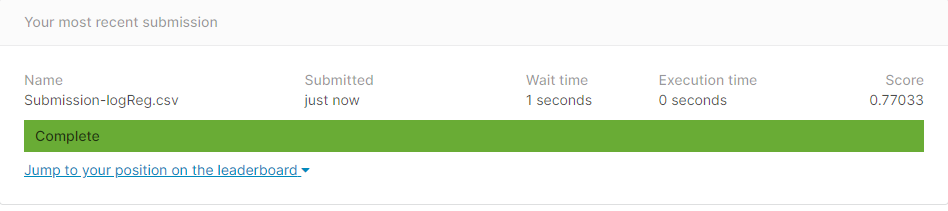

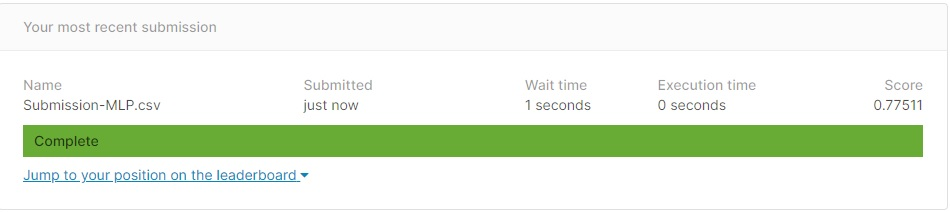

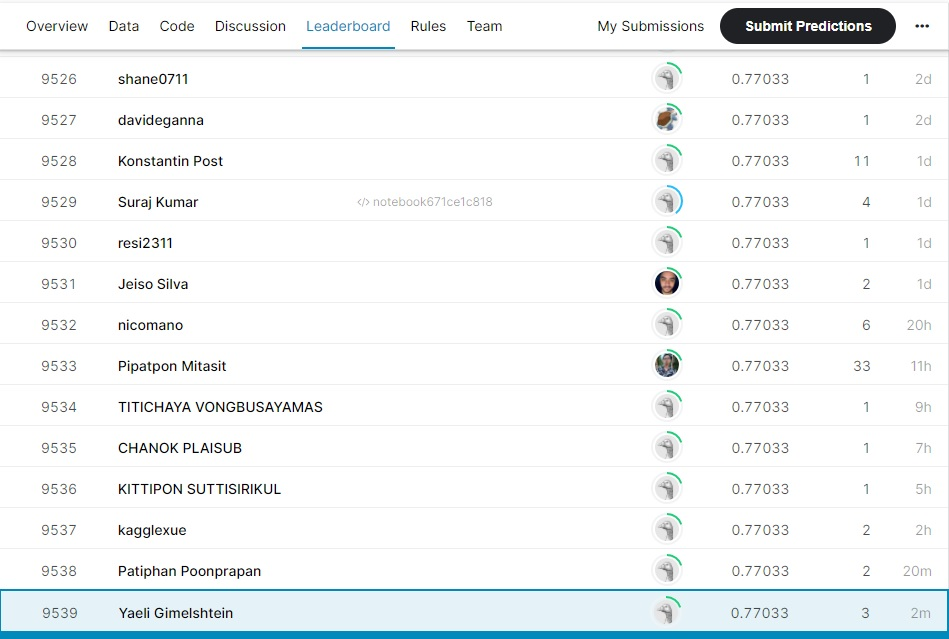

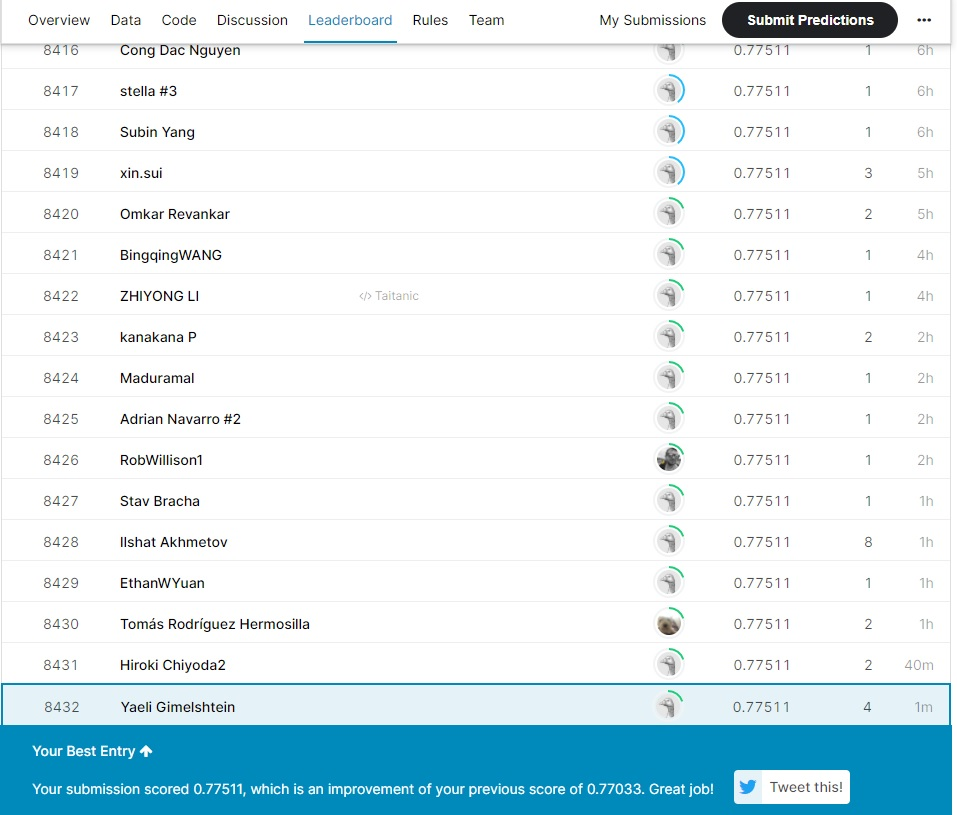

To sum up, we can see that MLP works a little bit better than Logistic Regression and tht makes since that MLP has layer of transforming featues and Logistic Regression doesnt.

1. Used some code of Almog's practice. 

2. https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix 
 
3. https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab





In [ ]:
%%shell
jupyter nbconvert --to html /content/Machine_Learning_hw1.ipynb

[NbConvertApp] Converting notebook /content/Machine_Learning_hw1.ipynb to html
[NbConvertApp] Writing 1625116 bytes to /content/Machine_Learning_hw1.html
